### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

см. descents.py

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

см. descents.py

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.
### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

см. descents.py

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

см. descents.py

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

**1. Визуализация распределения целевой переменной:**

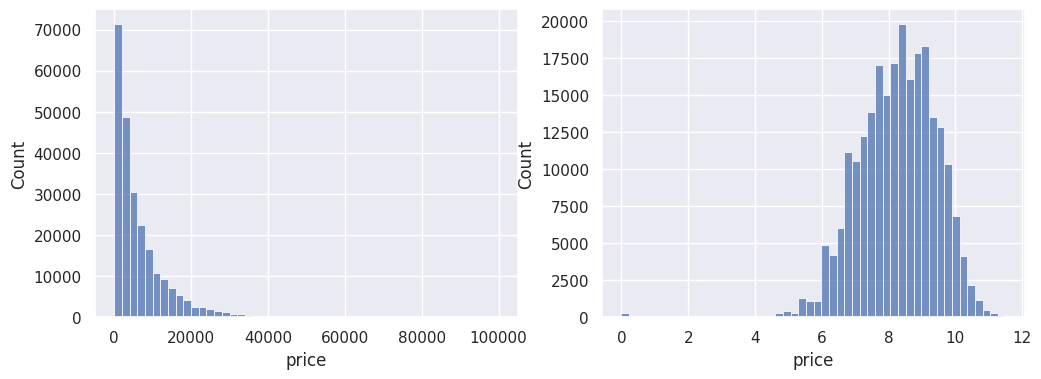

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
sns.histplot(data['price'], bins=50, ax=ax[0]);
sns.histplot(np.log(data['price']), bins=50, ax=ax[1]);

Будем использовать логарифм цены, так как распределение логарифма цены автомобиля больше похоже на нормальное.
Добавляем логарифм в исходный набор данных.

In [10]:
data['log_price'] = np.log(data['price'])

**2. Удаление выбросов**

In [11]:
mean = data['log_price'].mean()
std = data['log_price'].std()
data = data[(data['log_price'] > mean - 3 * std) & (data['log_price'] < mean + 3 * std)]

**3. Исследование данных**

In [12]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902


**3.1 brand - название бренда автомобиля**

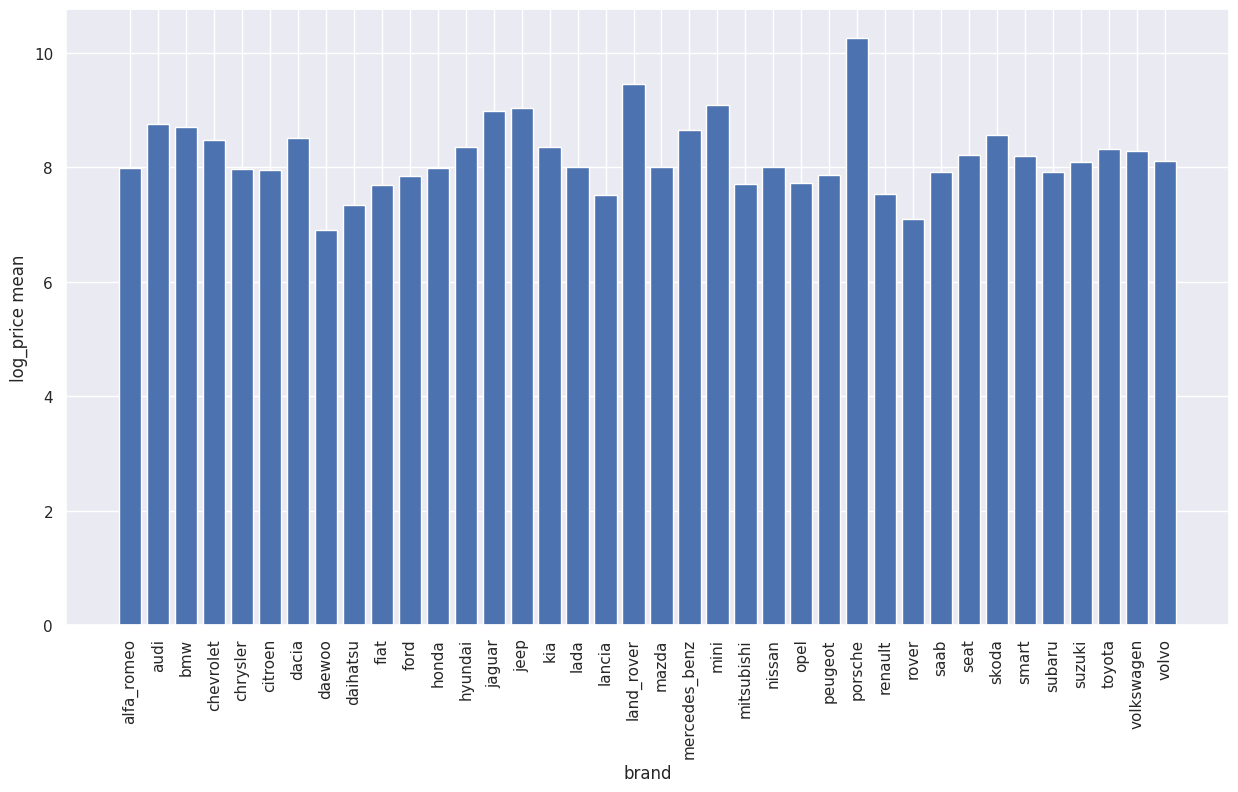

In [13]:
subset = data[['brand', 'log_price']].groupby('brand').mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset['brand'], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel('brand')
plt.xticks(rotation=90);

Признак brand относим к категориальным.

**3.2 model - название модели автомобиля**

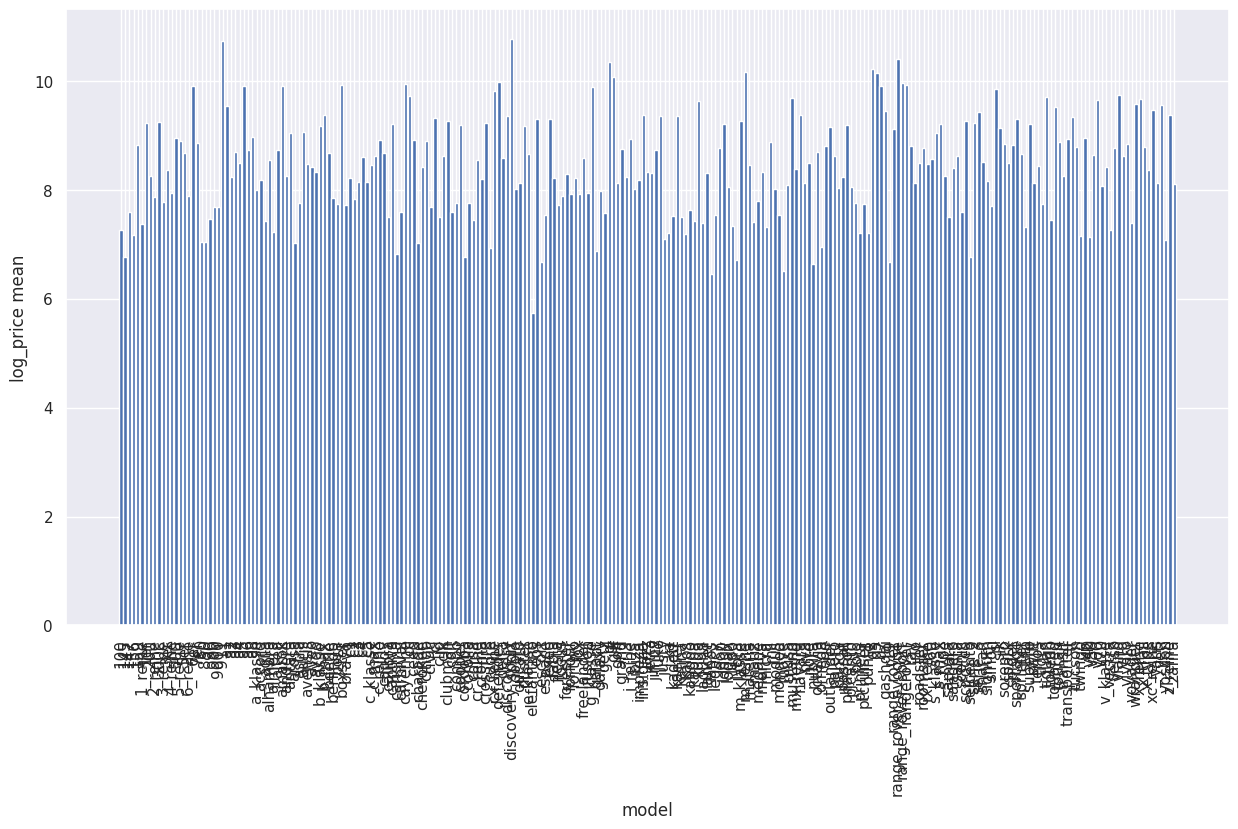

In [14]:
feature = 'model'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset[feature], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel(feature)
plt.xticks(rotation=90);

Признак model относим к категориальным

**3.3 `vehicleType` - тип транспортного средства**

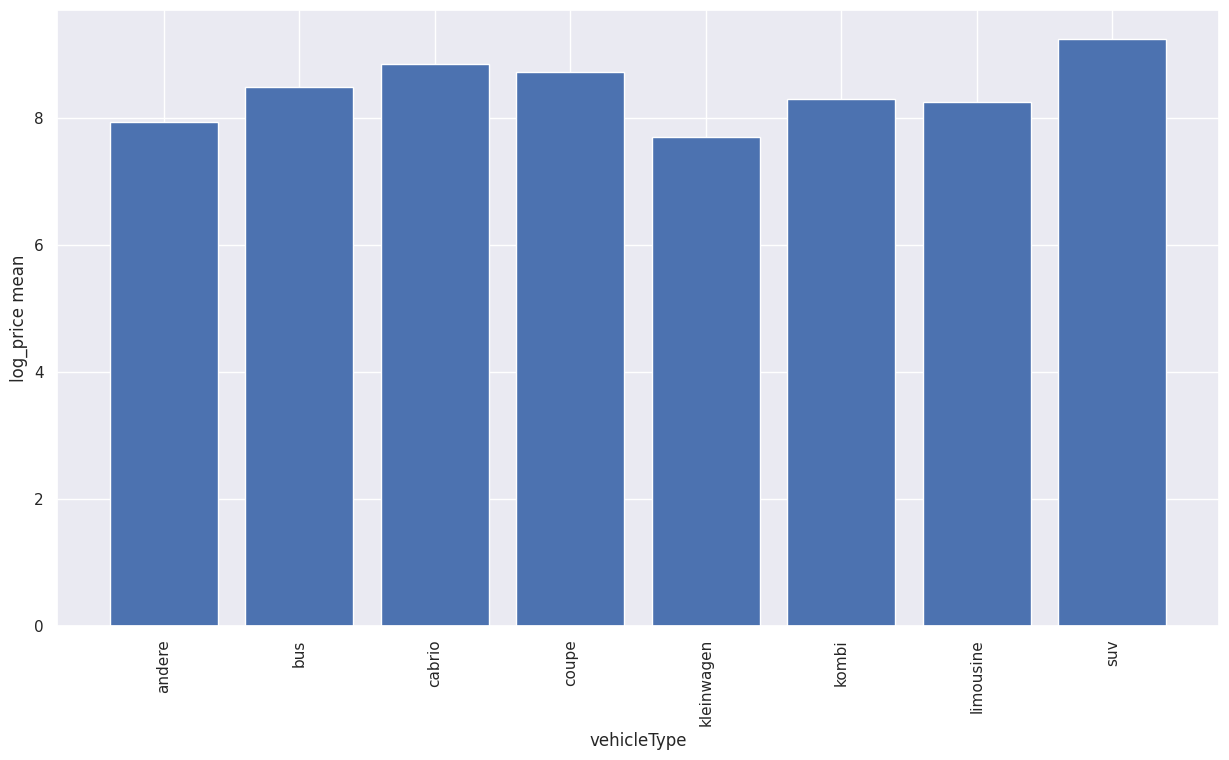

In [15]:
feature = 'vehicleType'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset[feature], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel(feature)
plt.xticks(rotation=90);

Признак vehicleType относим к категориальным

**3.4 `gearbox` - тип трансмисcии**

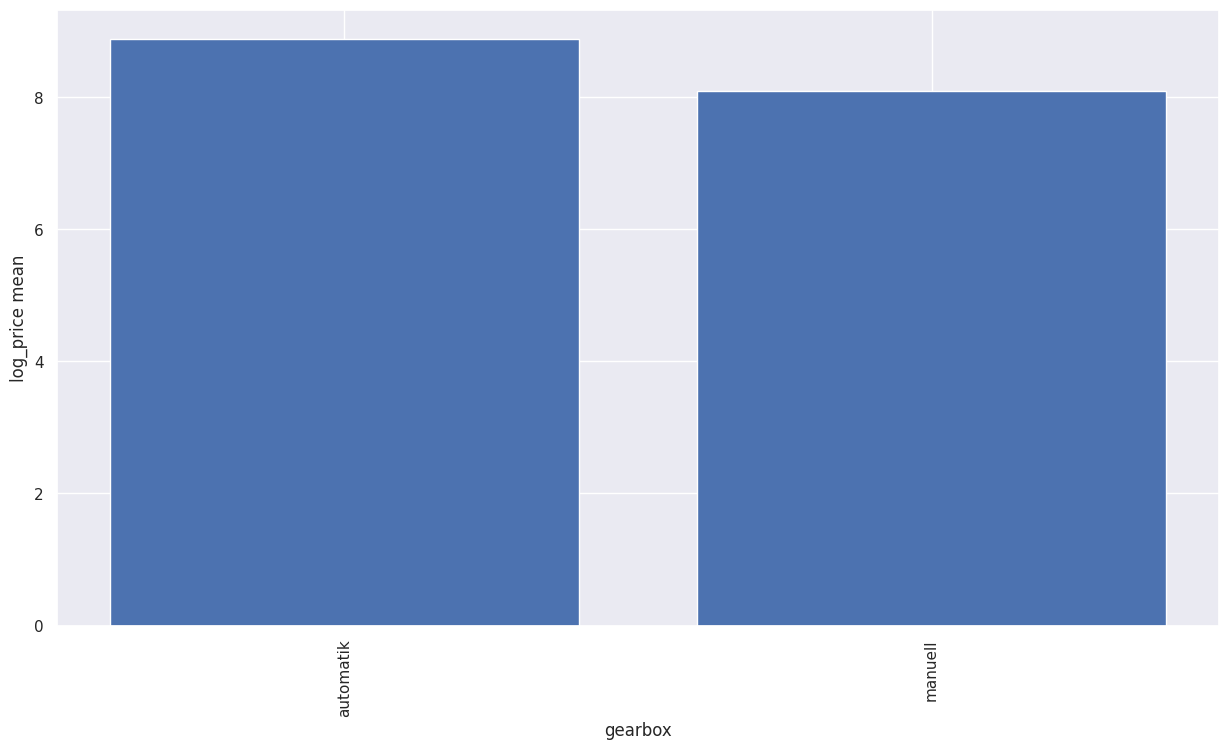

In [16]:
feature = 'gearbox'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset[feature], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel(feature)
plt.xticks(rotation=90);

gearbox - бинарный признак. Сделаем замену 'manuell' -> 0, 'automatic' -> 1. Предъобрабатывать его не будем.

In [17]:
pd.set_option('future.no_silent_downcasting', True)
data['gearbox'] = data['gearbox'].replace({'manuell' : 0, 'automatik' : 1})

**3.5`fuelType` - какой вид топлива использует автомобиль**

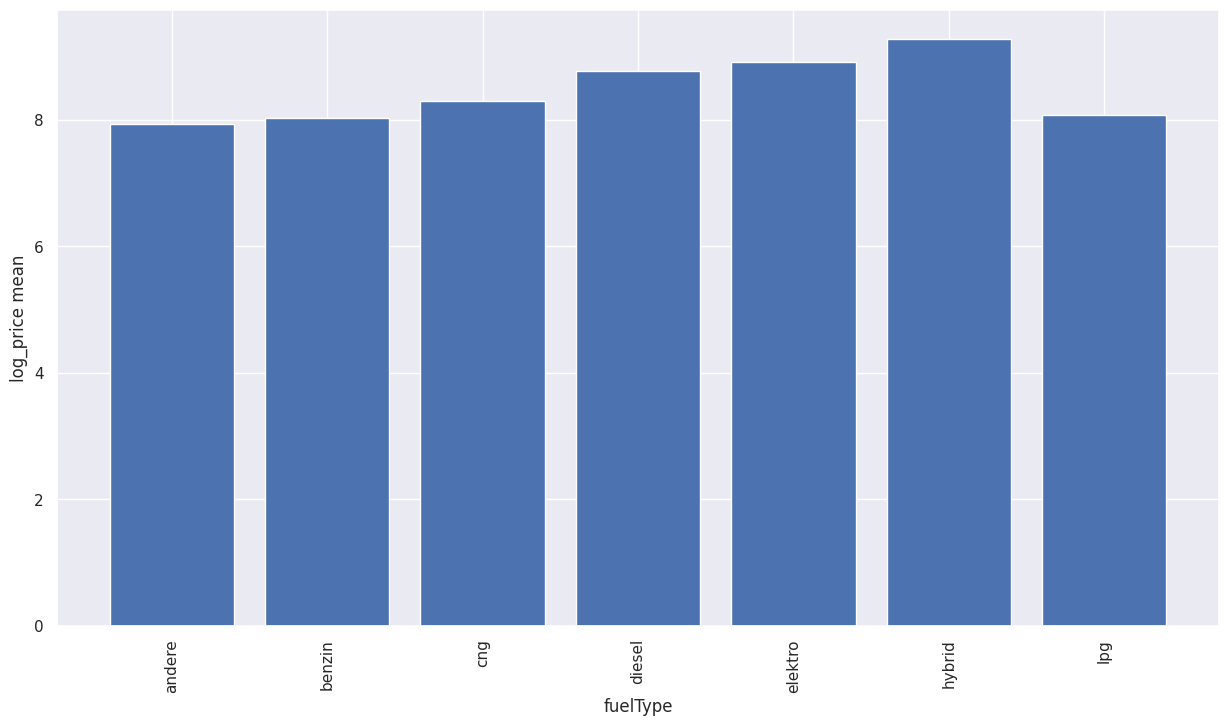

In [18]:
feature = 'fuelType'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset[feature], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel(feature)
plt.xticks(rotation=90);

Признак fuelType относим к категориальным

**3.6 `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена**

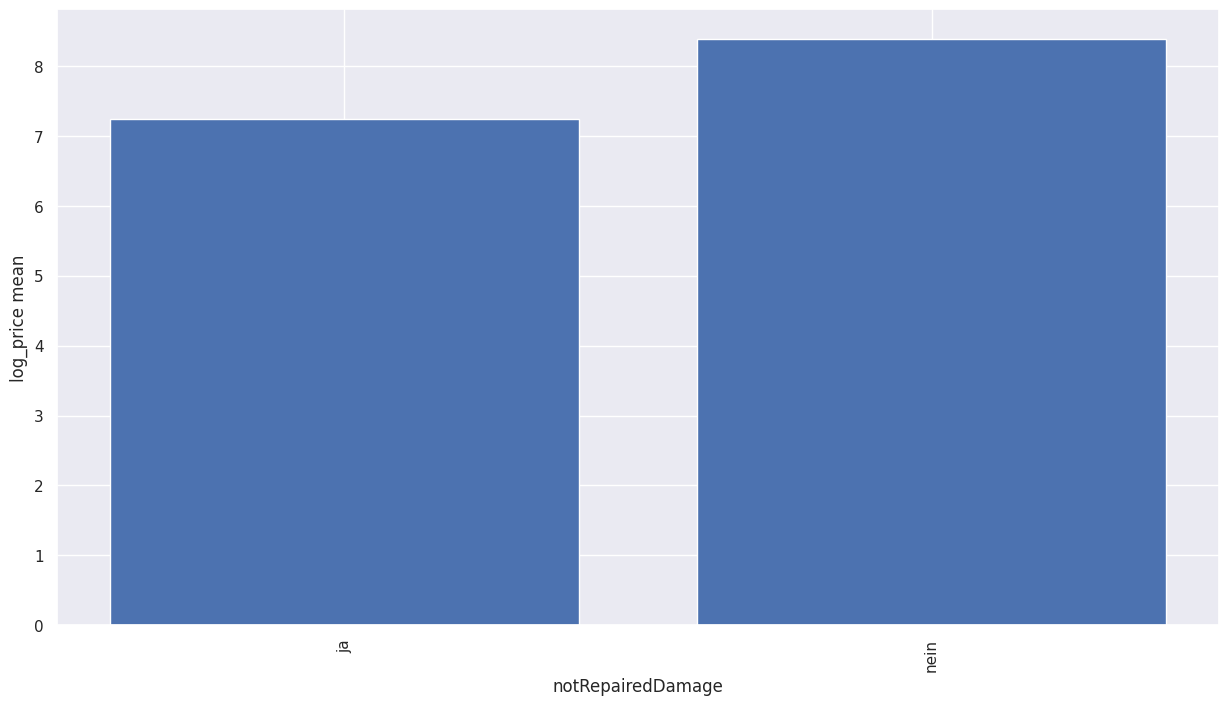

In [19]:
feature = 'notRepairedDamage'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
plt.figure(figsize = (15, 8))
plt.bar(subset[feature], height=subset['log_price'])

plt.ylabel('log_price mean')
plt.xlabel(feature)
plt.xticks(rotation=90);

notRepairedDamage - бинарный признак, не обрабатываем.

In [20]:
data['notRepairedDamage'] = data['notRepairedDamage'].replace({'ja' : 1, 'nein' : 0})

**3.7 `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)**

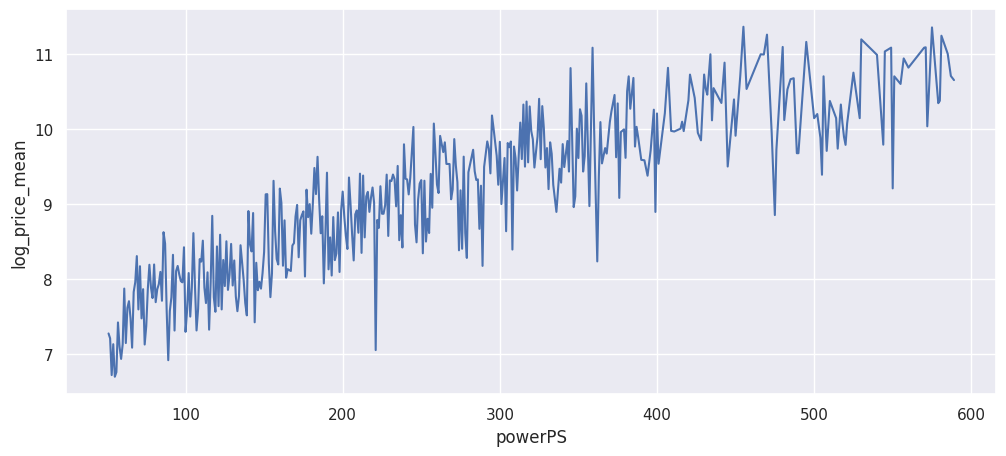

In [21]:
feature = 'powerPS'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
fig, ax = plt.subplots(figsize=(12,5));
sns.lineplot(data=subset, x=feature, y='log_price');
ax.set_ylabel('log_price_mean');

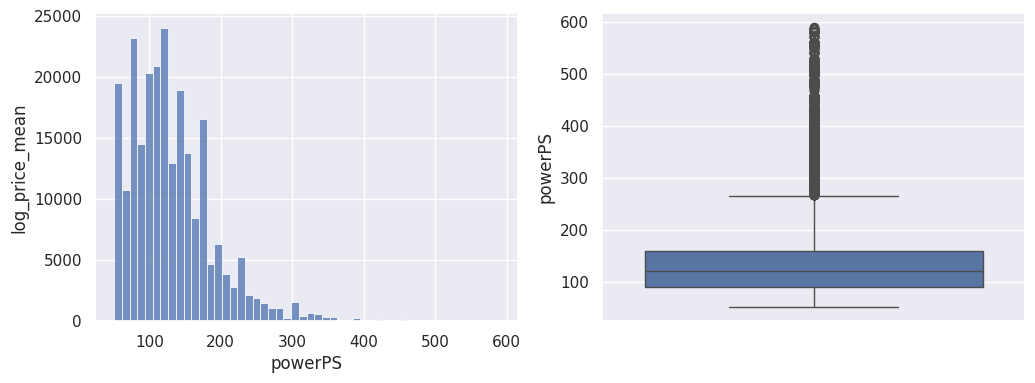

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
a0 = sns.histplot(data[feature], bins=50, ax=ax[0]);
a1 = sns.boxplot(y = data[feature], data = data, ax=ax[1])
a0.set_ylabel('log_price_mean');

Явно есть выбросы. Отфильтруем их.

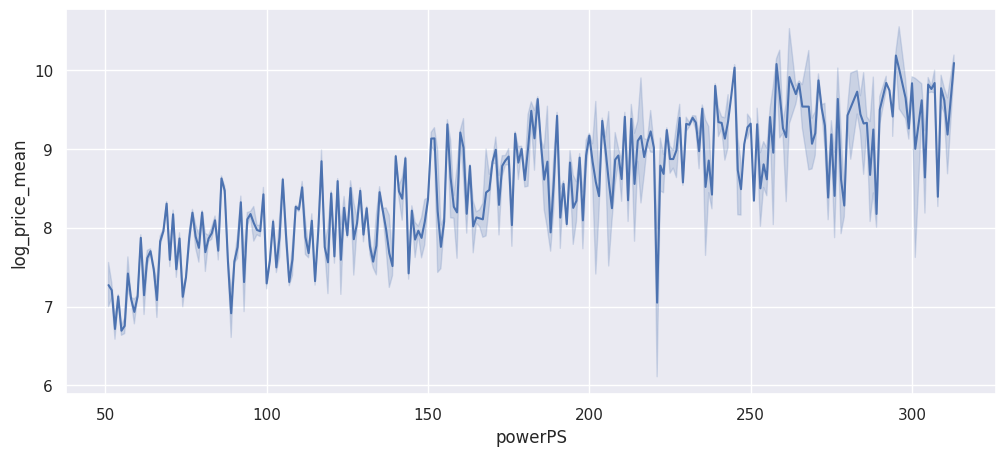

In [23]:
mean = data[feature].mean()
std = data[feature].std()
data = data[(data[feature] < mean + 3 * std)]

fig, ax = plt.subplots(figsize=(12,5));
sns.lineplot(data=data, x=feature, y='log_price');
ax.set_ylabel('log_price_mean');

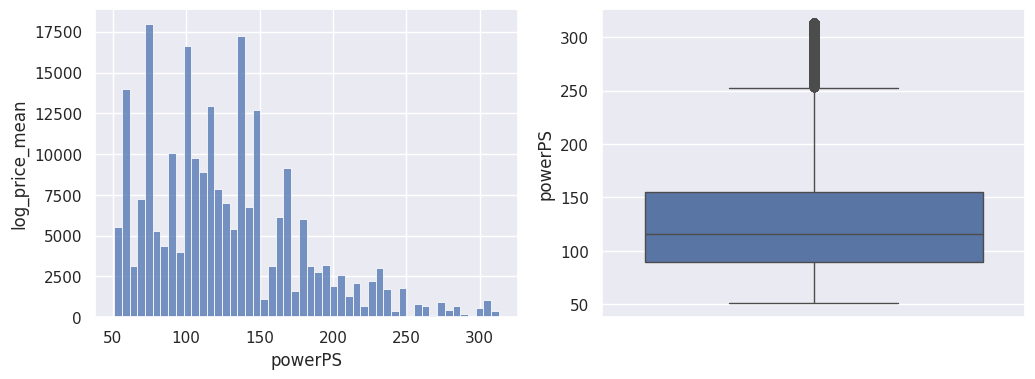

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
a0 = sns.histplot(data[feature], bins=50, ax=ax[0]);
a1 = sns.boxplot(y = data[feature], data = data, ax=ax[1])
a0.set_ylabel('log_price_mean');

powerPS относим к числовым признакам

**3.8 `kilometer` - сколько километров проехал автомобиль, пробег**

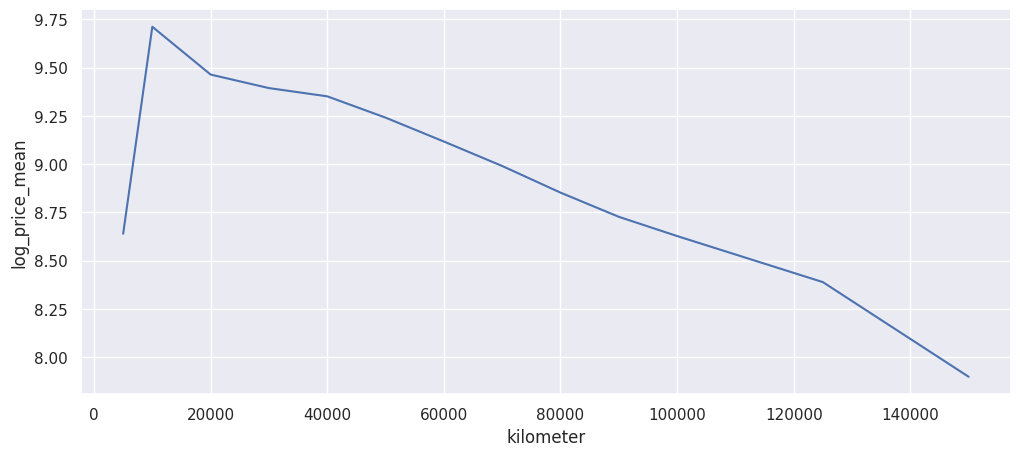

In [25]:
feature = 'kilometer'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
fig, ax = plt.subplots(figsize=(12,5));
sns.lineplot(data=subset, x=feature, y='log_price');
ax.set_ylabel('log_price_mean');

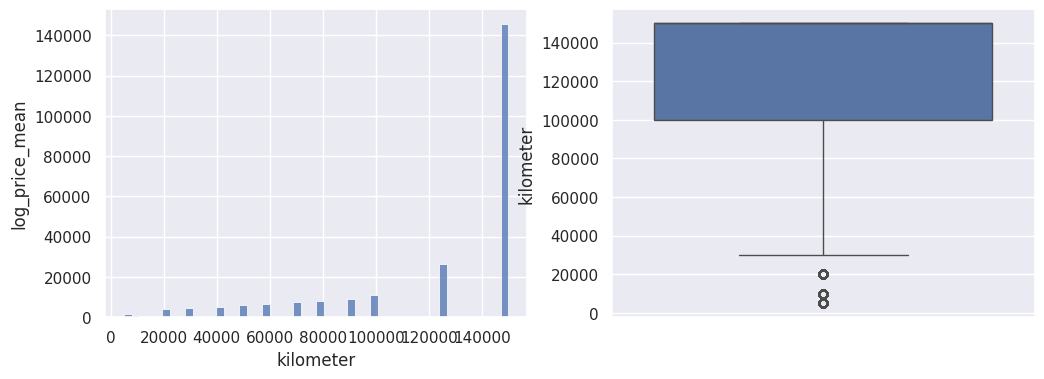

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
a0 = sns.histplot(data[feature], bins=50, ax=ax[0]);
a1 = sns.boxplot(y = data[feature], data = data, ax=ax[1])
a0.set_ylabel('log_price_mean');

kilometer относим к числовым признакам.

**3.9 `autoAgeMonths` - возраст автомобиля в месяцах**

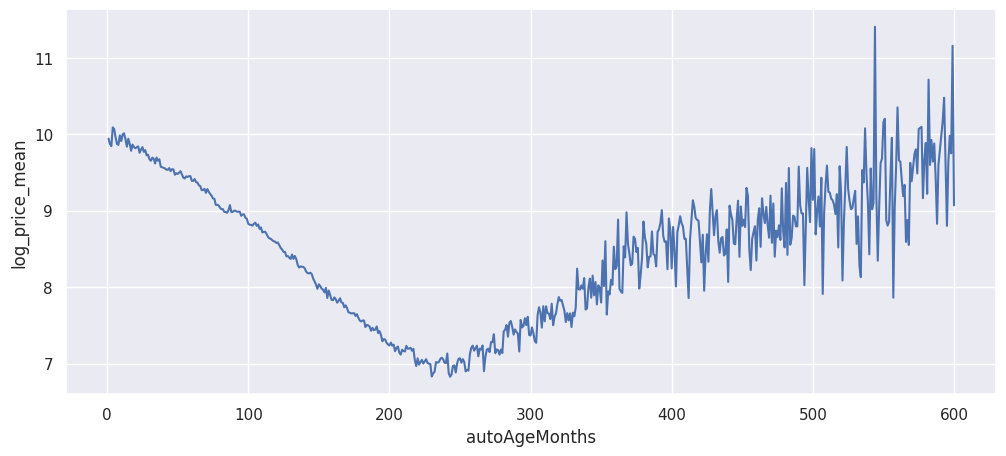

In [27]:
feature = 'autoAgeMonths'
subset = data[[feature, 'log_price']].groupby(feature).mean().reset_index()
fig, ax = plt.subplots(figsize=(12,5));
sns.lineplot(data=subset, x=feature, y='log_price');
ax.set_ylabel('log_price_mean');

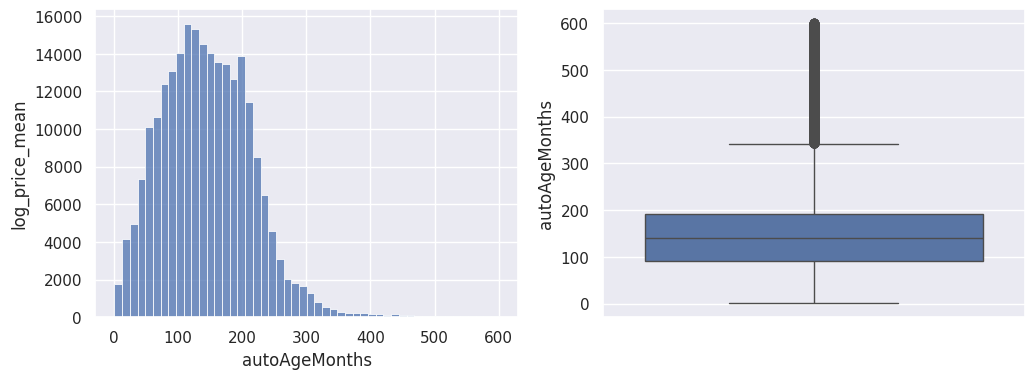

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
a0 = sns.histplot(data[feature], bins=50, ax=ax[0]);
a1 = sns.boxplot(y = data[feature], data = data, ax=ax[1])
a0.set_ylabel('log_price_mean');

Отфильтруем выбросы

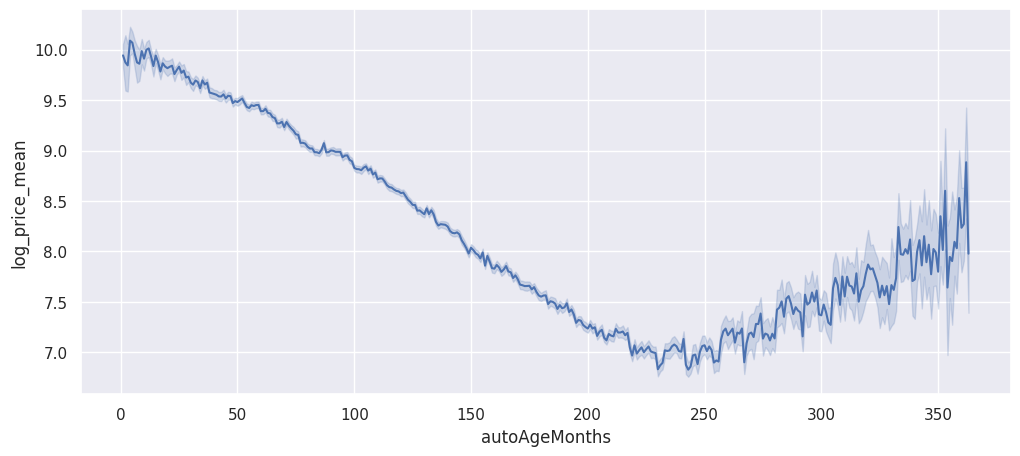

In [29]:
mean = data[feature].mean()
std = data[feature].std()
subset = data[(data[feature] < mean + 3 * std)]

fig, ax = plt.subplots(figsize=(12,5));
sns.lineplot(data=subset, x=feature, y='log_price');
ax.set_ylabel('log_price_mean');

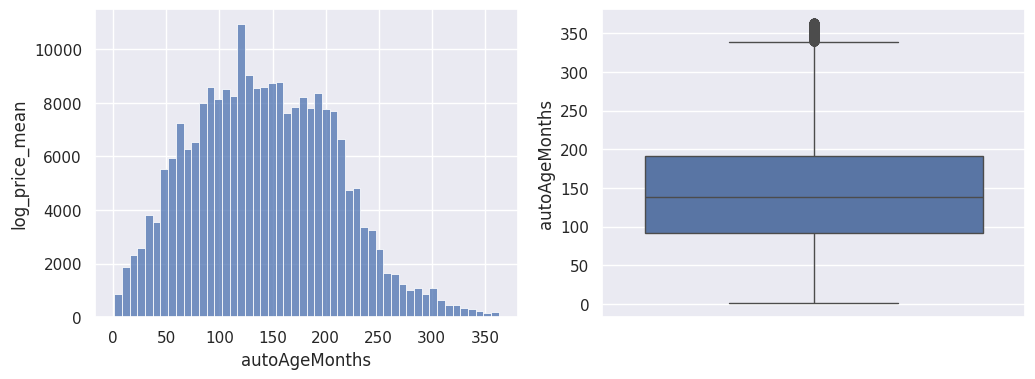

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12,4));
a0 = sns.histplot(subset[feature], bins=50, ax=ax[0]);
a1 = sns.boxplot(y = subset[feature], data = subset, ax=ax[1])
a0.set_ylabel('log_price_mean');

In [31]:
data = subset

autoAgeMonths относим к числовым признакам.

In [32]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,177,1500,7.313220
1,skoda,fabia,kleinwagen,0,diesel,0,69,90000,93,3600,8.188689
2,bmw,3er,limousine,0,benzin,1,102,150000,246,650,6.476972
3,peugeot,2_reihe,cabrio,0,benzin,0,109,150000,140,2200,7.696213
4,mazda,3_reihe,limousine,0,benzin,0,105,150000,136,2000,7.600902


In [33]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType' ]
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

In [34]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [36]:
# (data split into train/val/test):
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5)

print(x_train.shape[0], x_val.shape[0], x_test.shape[0])

187766 23471 23471


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [37]:
from sklearn.metrics import r2_score
import math

In [38]:
lambdas = np.logspace(-4, 1, 20)
methods = ['full', 'stochastic', 'momentum', 'adam']

In [39]:
# key -> method, value -> r2
r2_train = dict()
r2_test = dict()
iterations = dict()
loss_per_method = dict()
lambda_per_method = dict()

lambda_best = lambdas[0]
for method in methods:
    r2_max = 0
    r2_train_best = 0
    r2_test_best = 0
    iteration_best = 0
    loss = list()
    for lambda_ in lambdas:
        descent_config = {'descent_name': method,
                          'kwargs': {'lambda_': lambda_,
                                     'dimension': x_val.shape[1]}}
        regr = LinearRegression(descent_config=descent_config)
        regr.fit(x_val, y_val.to_numpy())
        r2_current = r2_score(y_val, regr.predict(x_val))
        if r2_current > r2_max:
            r2_train_best = r2_score(y_train, regr.predict(x_train))
            r2_test_best = r2_score(y_test, regr.predict(x_test))
            iteration_best = len(regr.loss_history)
            lambda_best = lambda_
            r2_max = r2_current
            regr.fit(x_train, y_train.to_numpy())
            loss = regr.loss_history

    lambda_per_method[method] = lambda_best
    r2_train[method] = r2_train_best
    r2_test[method] = r2_test_best
    iterations[method] = iteration_best
    loss_per_method[method] = loss

In [40]:
for method in methods:
    print(f'Method: {method}')
    print(f'R2 train: {r2_train[method]:.4f}')
    print(f'R2 test: {r2_test[method]:.4f}')
    print(f'Iterations to convergence: {iterations[method]}')

Method: full
R2 train: 0.8053
R2 test: 0.8047
Iterations to convergence: 81
Method: stochastic
R2 train: 0.7772
R2 test: 0.7776
Iterations to convergence: 301
Method: momentum
R2 train: 0.8267
R2 test: 0.8263
Iterations to convergence: 133
Method: adam
R2 train: 0.8334
R2 test: 0.8328
Iterations to convergence: 198


### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

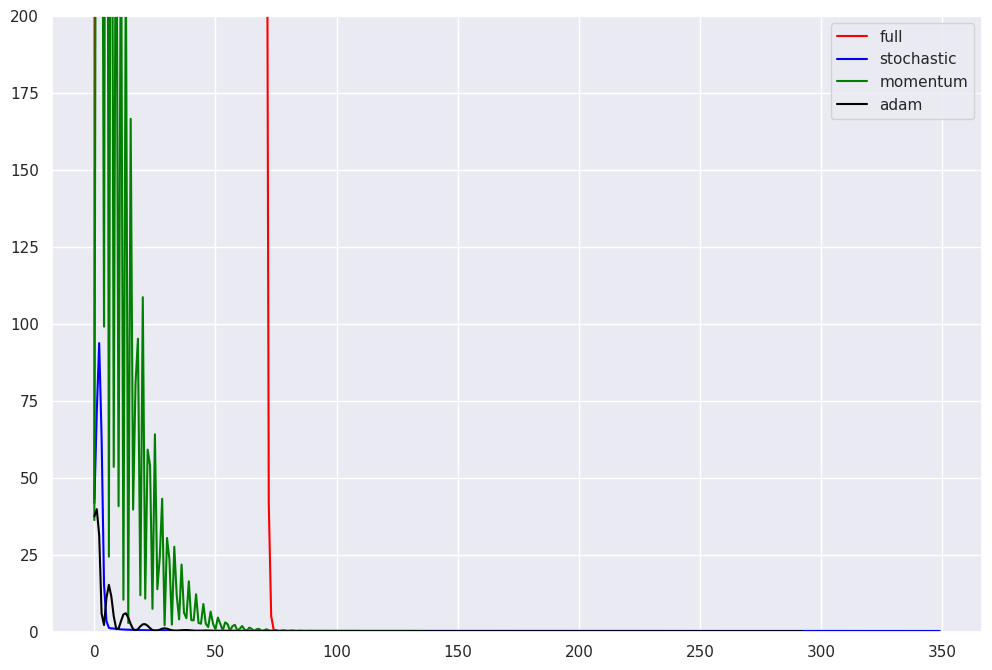

In [41]:
plt.figure(figsize=(12,8))
plt.plot(loss_per_method['full'], color='red', label='full')
plt.plot(loss_per_method['stochastic'], color='blue', label='stochastic')
plt.plot(loss_per_method['momentum'], color='green', label='momentum')
plt.plot(loss_per_method['adam'], color='black', label='adam')
plt.ylim(0, 200)
plt.legend();

Наибольшие значения метрик R2 получились у методов Adam & Momentum.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [42]:
batch_sizes = np.arange(5, 500, 10)

In [43]:
import time

times = np.zeros(batch_sizes.shape[0])
iters = np.zeros(batch_sizes.shape[0])

k = 10
for _ in range(k):
    times_batch = []
    iters_batch = []
    for batch in batch_sizes:
        start = time.time()
        descent_config = {'descent_name': 'stochastic',
                          'kwargs': {'lambda_': lambda_per_method['stochastic'],
                                     'dimension': x_train.shape[1],
                                     'batch_size': batch}}
        regr = LinearRegression(descent_config=descent_config)
        regr.fit(x_train, y_train.to_numpy())
        end = time.time()
        times_batch.append(end - start)
        iters_batch.append(len(regr.loss_history))

    times += times_batch
    iters += iters_batch

times *= (1 / k)
iters *= (1 / k)

Зависимость среднего количества итераций до сходимости от размеров батча

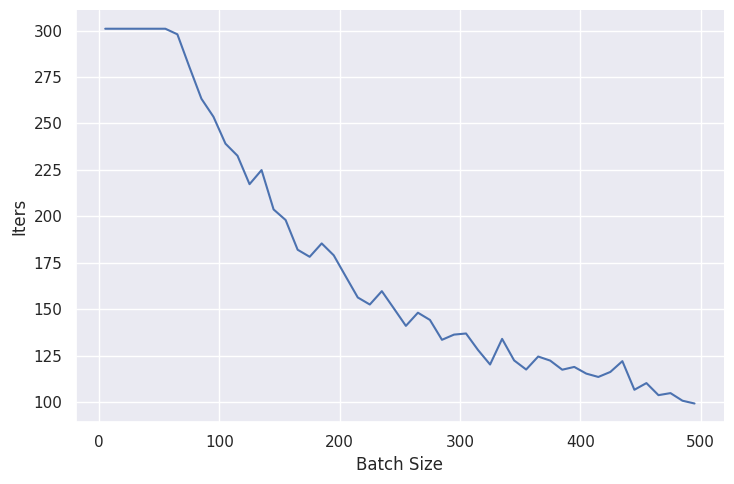

In [44]:
sns.relplot(x=batch_sizes, y=iters, aspect=1.5, kind='line')
plt.xlabel('Batch Size')
plt.ylabel('Iters');

Зависимость среднего времени обучения размеров батча

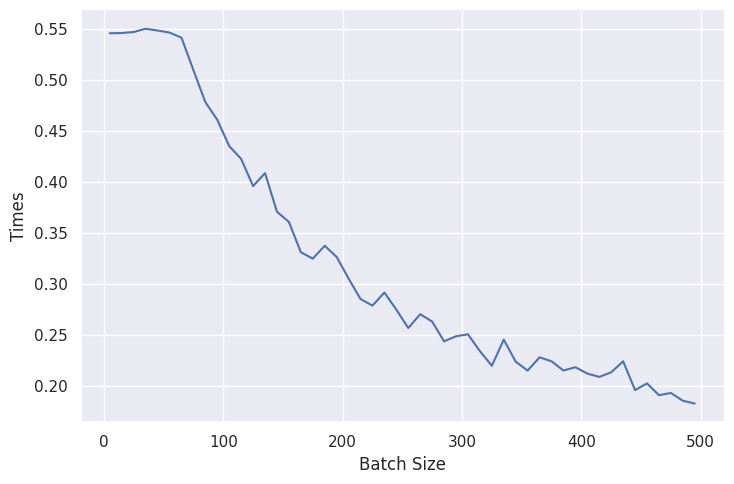

In [45]:
sns.relplot(x=batch_sizes, y=times, aspect=1.5, kind='line')
plt.xlabel('Batch Size')
plt.ylabel('Times');

C увеличением рамера батча снижается количество итераций до сходимости и время обучения. Существует некий оптимальный размер батча, при котором время обучения и количесво итераций снижаются незначительно. В данной конкретной задаче оптимальный размер батча ~ 380.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [46]:
lambdas = np.logspace(-4, 1, 30)
mus = np.logspace(-10, 0.5, 30)
methods = ['full', 'stochastic', 'momentum', 'adam']

# key -> method, val -> r2
r2_train_reg = dict()
r2_test_reg = dict()
iterations_reg = dict()
loss_per_method_reg = dict()
lambda_per_method_reg = dict()
mu_per_method_reg = dict()
for method in methods:
    r2_max = 0
    mu_best = 0
    lambda_best = 0
    loss = list()

    r2_train_best = -1
    r2_test_best = -1
    iteration_best = -1
    for mu in mus:
        for lambda_ in lambdas:
            descent_config = {'descent_name': method,
                              'regularized': True,
                              'kwargs': {'lambda_': lambda_,
                                         'mu': mu,
                                         'dimension': x_val.shape[1]}}
            regr = LinearRegression(descent_config=descent_config)
            regr.fit(x_val, y_val.to_numpy())
            r2_current = r2_score(y_val, regr.predict(x_val))
            if r2_current > r2_max:
                r2_train_best = r2_score(y_train, regr.predict(x_train))
                r2_test_best = r2_score(y_test, regr.predict(x_test))
                iteration_best = len(regr.loss_history)
                r2_max = r2_current
                lambda_best = lambda_
                mu_best = mu
                loss = regr.loss_history

    lambda_per_method_reg[method] = lambda_best
    mu_per_method_reg[method] = mu_best
    loss_per_method_reg[method] = loss

    r2_train_reg[method] = r2_train_best
    r2_test_reg[method] = r2_test_best
    iterations_reg[method] = iteration_best

/home/lxuser/.virtualenvs/default/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/lxuser/.virtualenvs/default/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/lxuser/.virtualenvs/default/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/lxuser/Documents/mai/02_machine_learning/ml-mai/lab04/descents.py:205: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) **  2)
/home/lxuser/.virtualenvs/default/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/lxuser/Documents/mai/02_machine_lea

In [47]:
for method in methods:
    print(f'Method: {method}')
    print(r'Without regularization:')
    print(f'\tR2 train: {r2_train[method]:.4f}')
    print(f'\tR2 test: {r2_test[method]:.4f}')
    print(f'\tIterations to convergence: {iterations[method]}')
    
    print(r'With regularization:')
    print(f'\tR2 train: {r2_train_reg[method]:.4f}')
    print(f'\tR2 test: {r2_test_reg[method]:.4f}')
    print(f'\tIterations to convergence: {iterations_reg[method]}')
    print('--------------------------------------')

Method: full
Without regularization:
	R2 train: 0.8053
	R2 test: 0.8047
	Iterations to convergence: 81
With regularization:
	R2 train: 0.7865
	R2 test: 0.7871
	Iterations to convergence: 204
--------------------------------------
Method: stochastic
Without regularization:
	R2 train: 0.7772
	R2 test: 0.7776
	Iterations to convergence: 301
With regularization:
	R2 train: 0.7436
	R2 test: 0.7419
	Iterations to convergence: 301
--------------------------------------
Method: momentum
Without regularization:
	R2 train: 0.8267
	R2 test: 0.8263
	Iterations to convergence: 133
With regularization:
	R2 train: 0.8301
	R2 test: 0.8308
	Iterations to convergence: 261
--------------------------------------
Method: adam
Without regularization:
	R2 train: 0.8334
	R2 test: 0.8328
	Iterations to convergence: 198
With regularization:
	R2 train: 0.8326
	R2 test: 0.8314
	Iterations to convergence: 301
--------------------------------------


Text(0.5, 0.98, 'Loss function')

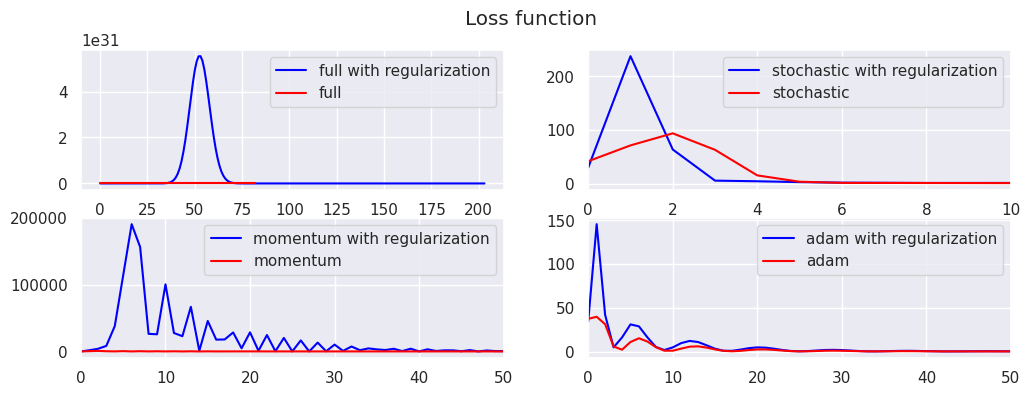

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(12,4));
ax[0,0].plot(loss_per_method_reg['full'], color='blue', label='full with regularization')
ax[0,0].plot(loss_per_method['full'], color='red', label='full')
ax[0,0].legend(loc='upper right')

ax[0,1].plot(loss_per_method_reg['stochastic'], color='blue', label='stochastic with regularization')
ax[0,1].plot(loss_per_method['stochastic'], color='red', label='stochastic')
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlim(0, 10)

ax[1,0].plot(loss_per_method_reg['momentum'], color='blue', label='momentum with regularization')
ax[1,0].plot(loss_per_method['momentum'], color='red', label='momentum')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlim(0, 50)

ax[1,1].plot(loss_per_method_reg['adam'], color='blue', label='adam with regularization')
ax[1,1].plot(loss_per_method['adam'], color='red', label='adam')
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlim(0, 50);

fig.suptitle('Loss function')

При решении задачи градиентного спуска с регуляризацией и без значения метрики качества R2 сопоставимы и отличаются в третьем знаке после запятой. Влияние регуляризации на количество итераций до сходимости не однозначное: для полного метода и метода momentum количесво итераций с регуляризацией более чем в два раза больше, чем без оной. Для метода adam количество итераций до сходимости с регуляризацией меньше, чем для решения без регуляризации. В методе stochastic применение регуляризации приводит к проблемам со сходимостью.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:
$$\nabla L(y, a) = \tanh{(Xw - y)^T}X$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [49]:
lambdas = np.logspace(-4, 1, 20)
methods = ['full', 'stochastic', 'momentum', 'adam']

In [50]:
r2_train_logcosh = dict()
r2_test_logcosh = dict()
iterations_logcosh = dict()
loss_per_method_logcosh = dict()
lambda_per_method_logcosh = dict()

lambda_best = lambdas[0]
for method in methods:
    r2_max = 0
    r2_train_best = 0
    r2_test_best = 0
    iteration_best = 0
    loss = list()
    for lambda_ in lambdas:
        descent_config = {'descent_name': method,
                          'loss_function': 'LogCosh',
                          'kwargs': {'lambda_': lambda_,
                                     'dimension': x_val.shape[1]}}
        regr = LinearRegression(descent_config=descent_config)
        regr.fit(x_val, y_val.to_numpy())
        r2_current = r2_score(y_val, regr.predict(x_val))
        if r2_current > r2_max:
            r2_train_best = r2_score(y_train, regr.predict(x_train))
            r2_test_best = r2_score(y_test, regr.predict(x_test))
            iteration_best = len(regr.loss_history)
            lambda_best = lambda_
            r2_max = r2_current
            regr.fit(x_train, y_train.to_numpy())
            loss = regr.loss_history

    lambda_per_method_logcosh[method] = lambda_best
    r2_train_logcosh[method] = r2_train_best
    r2_test_logcosh[method] = r2_test_best
    iterations_logcosh[method] = iteration_best
    loss_per_method_logcosh[method] = loss

In [63]:
for method in methods:
    print(f'Method: {method}')
    print(f'R2 train logcosh: {r2_train_logcosh[method]:.4f}')
    print(f'R2 test logcosh: {r2_test_logcosh[method]:.4f}')
    print(f'Iterations to convergence logcosh: {iterations_logcosh[method]}')

    print(f'R2 train: {r2_train[method]:.4f}')
    print(f'R2 test: {r2_test[method]:.4f}')
    print(f'Iterations to convergence: {iterations[method]}')

Method: full
R2 train logcosh: 0.8012
R2 test logcosh: 0.8022
Iterations to convergence logcosh: 80
R2 train: 0.8053
R2 test: 0.8047
Iterations to convergence: 81
Method: stochastic
R2 train logcosh: 0.7828
R2 test logcosh: 0.7818
Iterations to convergence logcosh: 301
R2 train: 0.7772
R2 test: 0.7776
Iterations to convergence: 301
Method: momentum
R2 train logcosh: 0.8272
R2 test logcosh: 0.8274
Iterations to convergence logcosh: 133
R2 train: 0.8267
R2 test: 0.8263
Iterations to convergence: 133
Method: adam
R2 train logcosh: 0.8332
R2 test logcosh: 0.8328
Iterations to convergence logcosh: 187
R2 train: 0.8334
R2 test: 0.8328
Iterations to convergence: 198


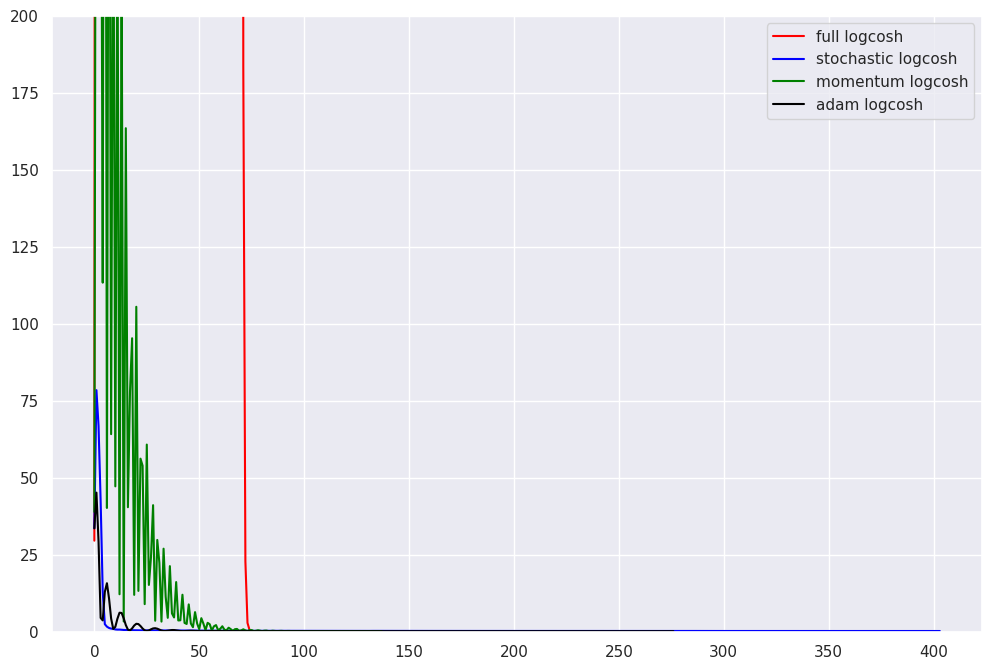

In [62]:
plt.figure(figsize=(12,8))
plt.plot(loss_per_method_logcosh['full'], color='red', label='full logcosh')
plt.plot(loss_per_method_logcosh['stochastic'], color='blue', label='stochastic logcosh')
plt.plot(loss_per_method_logcosh['momentum'], color='green', label='momentum logcosh')
plt.plot(loss_per_method_logcosh['adam'], color='black', label='adam logcosh')
plt.ylim(0, 200)
plt.legend();